In [1]:
from nba_api.stats.endpoints import playercareerstats as pcs
from nba_api.stats.static import teams
from nba_api.stats.static import players
import pandas as pd
import json
import time
import requests
from pprint import pprint
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [56]:
nba_teams = teams.get_teams()
rockets = [team for team in nba_teams if team['abbreviation'] == 'HOU'][0]
rockets_id = rockets['id']
thunder = [team for team in nba_teams if team['abbreviation'] == 'OKC'][0]
thunder_id = thunder['id']

1610612760

In [50]:
from nba_api.stats.endpoints import playergamelog as pgl
rw = pgl.PlayerGameLog(player_id='201566', season = '2018-19').get_data_frames()[0]
rw["PTS/48"] = (rw["PTS"]/rw["MIN"])*48

In [52]:
cp = pgl.PlayerGameLog(player_id='101108', season = '2018-19').get_data_frames()[0]
cp["PTS/48"] = (rw["PTS"]/rw["MIN"])*48
cp.count()

SEASON_ID          58
Player_ID          58
Game_ID            58
GAME_DATE          58
MATCHUP            58
WL                 58
MIN                58
FGM                58
FGA                58
FG_PCT             58
FG3M               58
FG3A               58
FG3_PCT            58
FTM                58
FTA                58
FT_PCT             58
OREB               58
DREB               58
REB                58
AST                58
STL                58
BLK                58
TOV                58
PF                 58
PTS                58
PLUS_MINUS         58
VIDEO_AVAILABLE    58
PTS/48             58
dtype: int64

In [68]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=rockets_id)
rockets_games = gamefinder.get_data_frames()[0]

thunder_gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=thunder_id)
thunder_games = thunder_gamefinder.get_data_frames()[0]

In [69]:
cp_merge = cp.merge(rockets_games,left_on='Game_ID',right_on='GAME_ID',how = 'left')
rw_merge = rw.merge(thunder_games,left_on='Game_ID',right_on='GAME_ID',how = 'left')
rw_merge.count()

SEASON_ID_x          73
Player_ID            73
Game_ID              73
GAME_DATE_x          73
MATCHUP_x            73
WL_x                 73
MIN_x                73
FGM_x                73
FGA_x                73
FG_PCT_x             73
FG3M_x               73
FG3A_x               73
FG3_PCT_x            73
FTM_x                73
FTA_x                73
FT_PCT_x             73
OREB_x               73
DREB_x               73
REB_x                73
AST_x                73
STL_x                73
BLK_x                73
TOV_x                73
PF_x                 73
PTS_x                73
PLUS_MINUS_x         73
VIDEO_AVAILABLE      73
PTS/48               73
SEASON_ID_y          73
TEAM_ID              73
TEAM_ABBREVIATION    73
TEAM_NAME            73
GAME_ID              73
GAME_DATE_y          73
MATCHUP_y            73
WL_y                 73
MIN_y                73
PTS_y                73
FGM_y                73
FGA_y                73
FG_PCT_y             73
FG3M_y          

In [73]:
rw_merge.to_csv("Russell Westbrook")

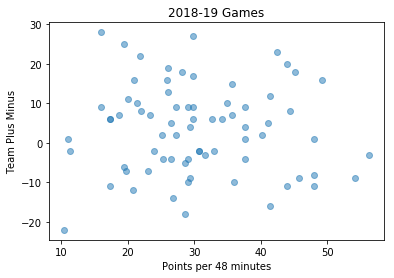

In [72]:
plt.scatter(rw_merge['PTS/48'], rw_merge['PLUS_MINUS_y'], alpha=0.5)
plt.xlabel("Points per 48 minutes")
plt.ylabel("Team Plus Minus")
plt.title("2018-19 Games")
plt.show()

In [ ]:
plt.scatter(rw_merge['PTS/48'], rw_merge['PLUS_MINUS_y'], alpha=0.5)
plt.xlabel("Points per 48 minutes")
plt.ylabel("Team Plus Minus")
plt.title("2018-19 Games")
plt.show()

In [39]:
RW_career = pcs.PlayerCareerStats(player_id='201566')
RW_career_df = RW_career.get_data_frames()[1]
RW_seasons_df = RW_career.get_data_frames()[0]
RW_2018_2019_df = RW_seasons_df[len(RW_seasons_df)-1:]
RW_2018_2019_df.count()

PLAYER_ID            1
SEASON_ID            1
LEAGUE_ID            1
TEAM_ID              1
TEAM_ABBREVIATION    1
PLAYER_AGE           1
GP                   1
GS                   1
MIN                  1
FGM                  1
FGA                  1
FG_PCT               1
FG3M                 1
FG3A                 1
FG3_PCT              1
FTM                  1
FTA                  1
FT_PCT               1
OREB                 1
DREB                 1
REB                  1
AST                  1
STL                  1
BLK                  1
TOV                  1
PF                   1
PTS                  1
dtype: int64

In [37]:
CP_career = pcs.PlayerCareerStats(player_id='101108')
CP_career_df = CP_career.get_data_frames()[1]
CP_seasons_df = CP_career.get_data_frames()[0]
CP_2018_2019_df = CP_seasons_df[len(CP_seasons_df)-1:]
CP_2018_2019_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
13,101108,2018-19,00,1610612745,HOU,34.0,58,58,1857.0,302,...,0.862,36,229,265,473,114,18,152,146,906


In [41]:
CP_ast_to_tov = CP_2018_2019_df["AST"]/CP_2018_2019_df["TOV"]
RW_ast_to_tov = RW_2018_2019_df["AST"]/RW_2018_2019_df["TOV"]

In [8]:
nba_players = players.get_players()
player_df = json_normalize(nba_players)
active_players_df = player_df[player_df.is_active == True].reset_index()
active_players_df

,index,first_name,full_name,id,is_active,last_name
0,9,Alex,Alex Abrines,203518,True,Abrines
1,14,Quincy,Quincy Acy,203112,True,Acy
2,18,Jaylen,Jaylen Adams,1629121,True,Adams
3,21,Steven,Steven Adams,203500,True,Adams
4,23,Bam,Bam Adebayo,1628389,True,Adebayo
5,24,Deng,Deng Adel,1629061,True,Adel
6,35,DeVaughn,DeVaughn Akoon-Purcell,1629152,True,Akoon-Purcell
7,41,LaMarcus,LaMarcus Aldridge,200746,True,Aldridge
8,50,Rawle,Rawle Alkins,1628959,True,Alkins
9,52,Grayson,Grayson Allen,1628960,True,Allen
